

## <font color=red>US unemployment and crime</font>


### Load Packages

In [2]:
library("dplyr", quietly = TRUE)
library("ggrepel")
library("maps", quietly = TRUE)
library("mapproj", quietly = TRUE)
library("ggplot2", quietly = TRUE)
library("tidyverse", quietly = TRUE)
library("viridis", quietly = TRUE)
library("sf", quietly = TRUE)
library("patchwork")
library("wesanderson")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.5     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::map()    masks maps::map()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'viridis'


The following object is masked from 'package:maps':

    unemp


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



### Load Data and Explore

In [3]:
us_states_map <- map_data("state")
us_county_map <- map_data("county")

In [4]:
#print top rows
head(us_states_map)

long      lat      group order region  subregion
1 -87.46201 30.38968 1     1     alabama NA       
2 -87.48493 30.37249 1     2     alabama NA       
3 -87.52503 30.37249 1     3     alabama NA       
4 -87.53076 30.33239 1     4     alabama NA       
5 -87.57087 30.32665 1     5     alabama NA       
6 -87.58806 30.32665 1     6     alabama NA

In [5]:
head(us_county_map)

long      lat      group order region  subregion
1 -86.50517 32.34920 1     1     alabama autauga  
2 -86.53382 32.35493 1     2     alabama autauga  
3 -86.54527 32.36639 1     3     alabama autauga  
4 -86.55673 32.37785 1     4     alabama autauga  
5 -86.57966 32.38357 1     5     alabama autauga  
6 -86.59111 32.37785 1     6     alabama autauga

### Get Count of Counties for Each State

In [6]:
# get count of counties by state
us_county_count_by_state <- us_county_map %>%
  group_by(region) %>%
  summarise(count = n()) %>%
  arrange(desc(count))


# left join count onto state map
us_states_map <- left_join(us_states_map, us_county_count_by_state, by = c("region" = "region"))

head(us_states_map)


long      lat      group order region  subregion count
1 -87.46201 30.38968 1     1     alabama NA        3092 
2 -87.48493 30.37249 1     2     alabama NA        3092 
3 -87.52503 30.37249 1     3     alabama NA        3092 
4 -87.53076 30.33239 1     4     alabama NA        3092 
5 -87.57087 30.32665 1     5     alabama NA        3092 
6 -87.58806 30.32665 1     6     alabama NA        3092

In [7]:
options(repr.plot.width=15, repr.plot.height=10)


## Question 1
Create a basic b/w map of US, showing only the states. Print also the name of the states at the center of each state.


In [8]:

us_states_map_centroids <- us_states_map %>%
  group_by(region) %>%
  summarise(cent_long = mean(long), cent_lat = mean(lat))

# create new column for the centroids lat, lng

us_states_map <- left_join(us_states_map, us_states_map_centroids, by = c("region" = "region"))
head(us_states_map)

long      lat      group order region  subregion count cent_long cent_lat
1 -87.46201 30.38968 1     1     alabama NA        3092  -86.85342 31.66372
2 -87.48493 30.37249 1     2     alabama NA        3092  -86.85342 31.66372
3 -87.52503 30.37249 1     3     alabama NA        3092  -86.85342 31.66372
4 -87.53076 30.33239 1     4     alabama NA        3092  -86.85342 31.66372
5 -87.57087 30.32665 1     5     alabama NA        3092  -86.85342 31.66372
6 -87.58806 30.32665 1     6     alabama NA        3092  -86.85342 31.66372

In [9]:
# create unique label and centroid
head(us_states_map_centroids)

region      cent_long  cent_lat
1 alabama      -86.85342 31.66372
2 arizona     -113.27464 34.52859
3 arkansas     -91.28040 34.63297
4 california  -120.70642 36.71313
5 colorado    -105.07031 38.58087
6 connecticut  -72.72006 41.38260

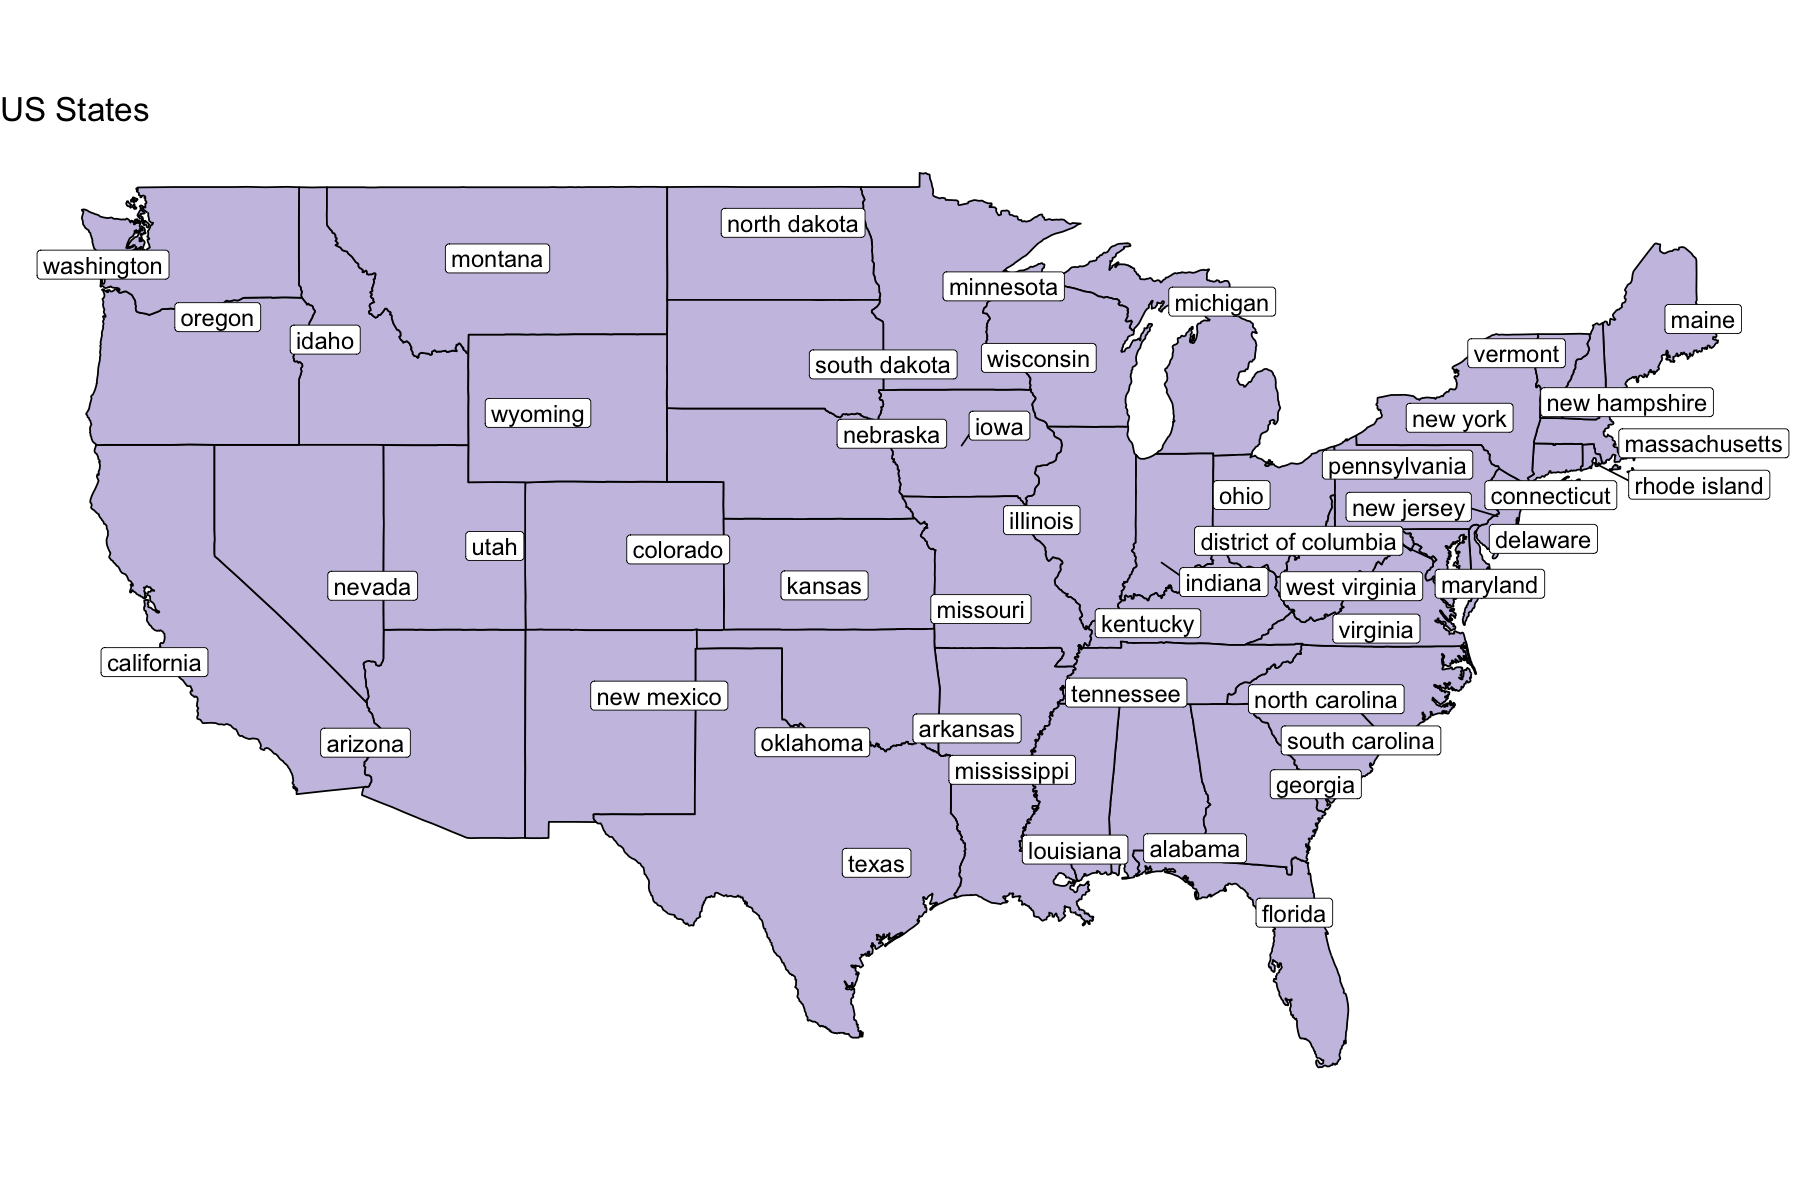

In [10]:
# Create a basic b/w map of US, showing only the states. Print also the name of the states at the center of each state.

ggplot() +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), fill = "#CBC3E3", color = "black") +
  geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black", max.overlaps = 20) +

  coord_fixed(1.3) +
  labs(title = "US States") +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) 


Here I used ggrepel to distance the labels from the overlapping. 

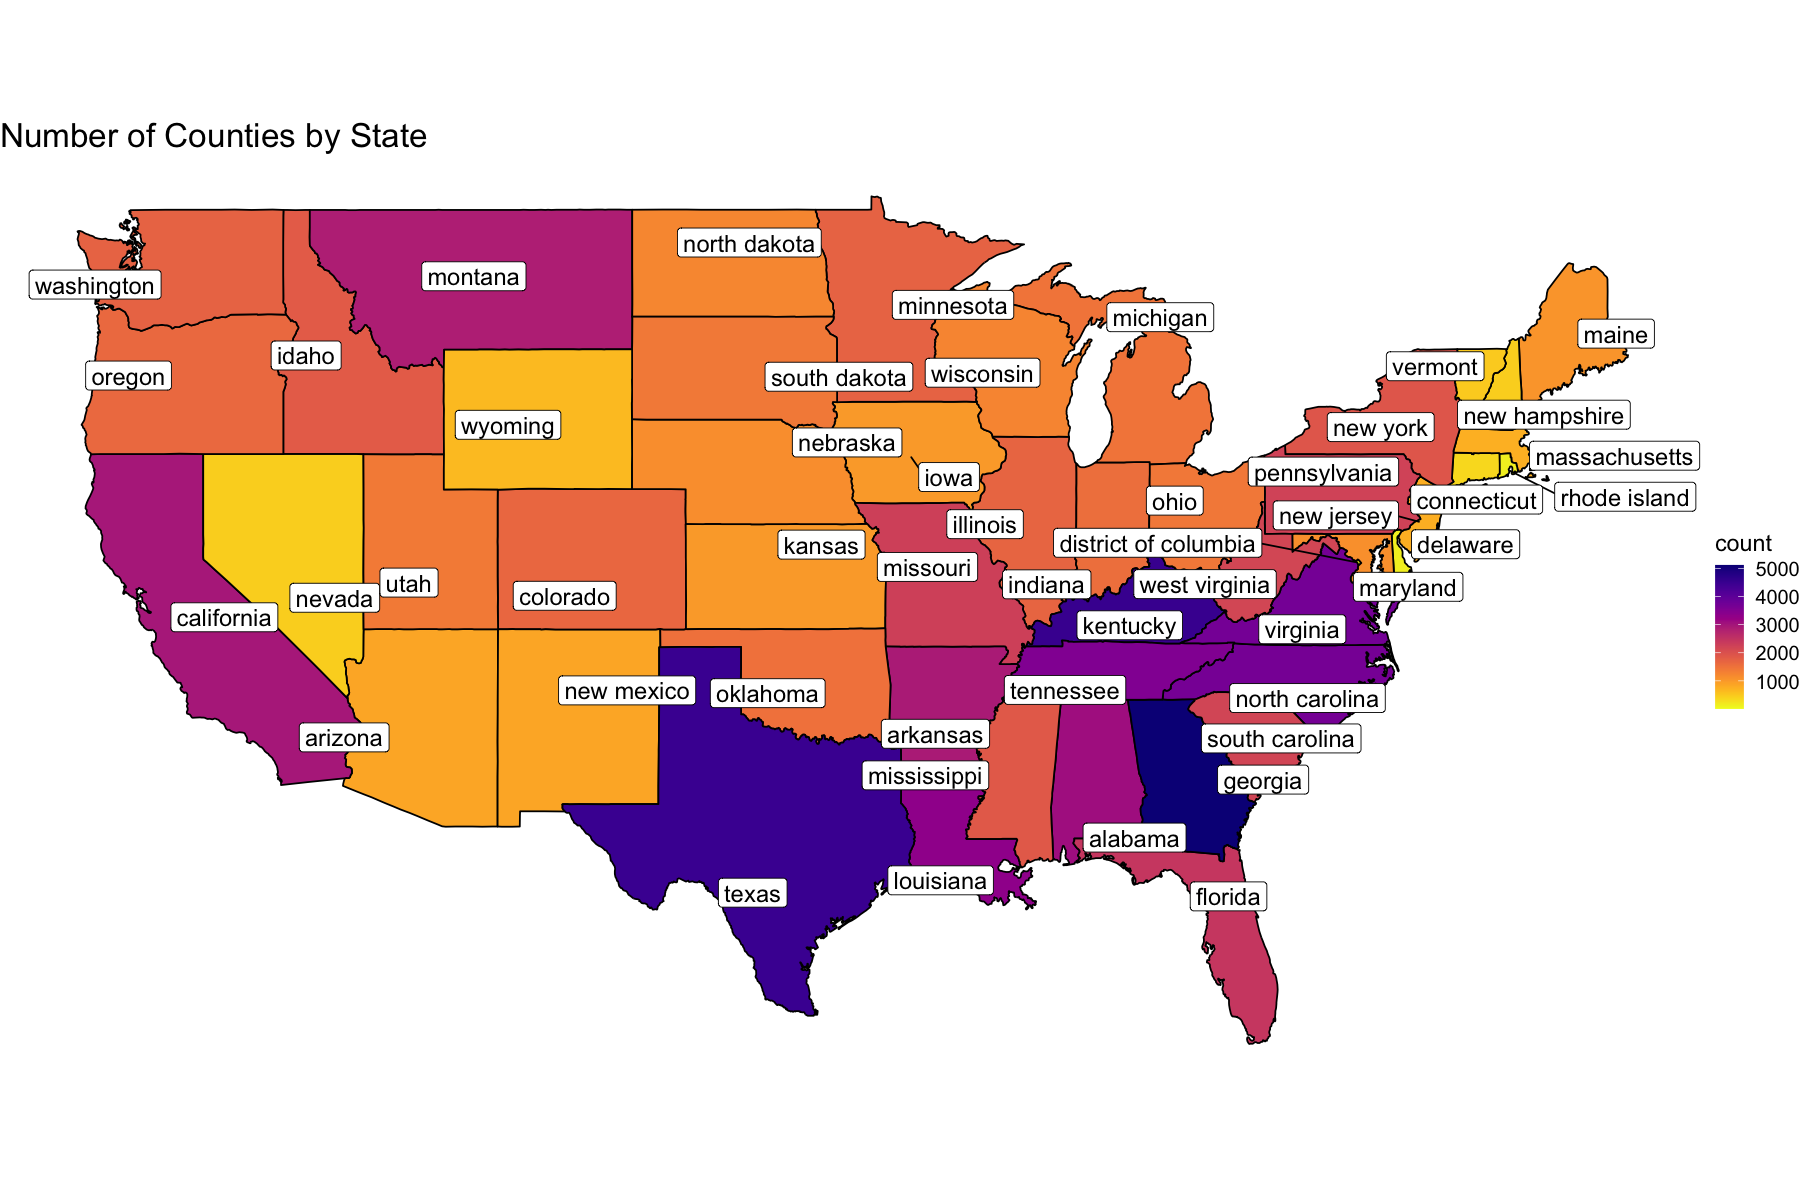

In [11]:
# Create a basic b/w map of US, showing only the states. Print also the name of the states at the center of each state.

ggplot() +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group, fill=count),  color = "black") +
  geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black", max.overlaps = 20) +
  coord_fixed(1.3) +
  scale_fill_viridis(option = "plasma", direction = -1) +
  labs(title="Number of Counties by State", ) + 
  theme(plot.title = element_text(size = 30)) +
  theme_void()  +
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 


Checking out the count of counties per state. 

## Question 2
Add a layer with the county borders, colored gray and semi-transparent.

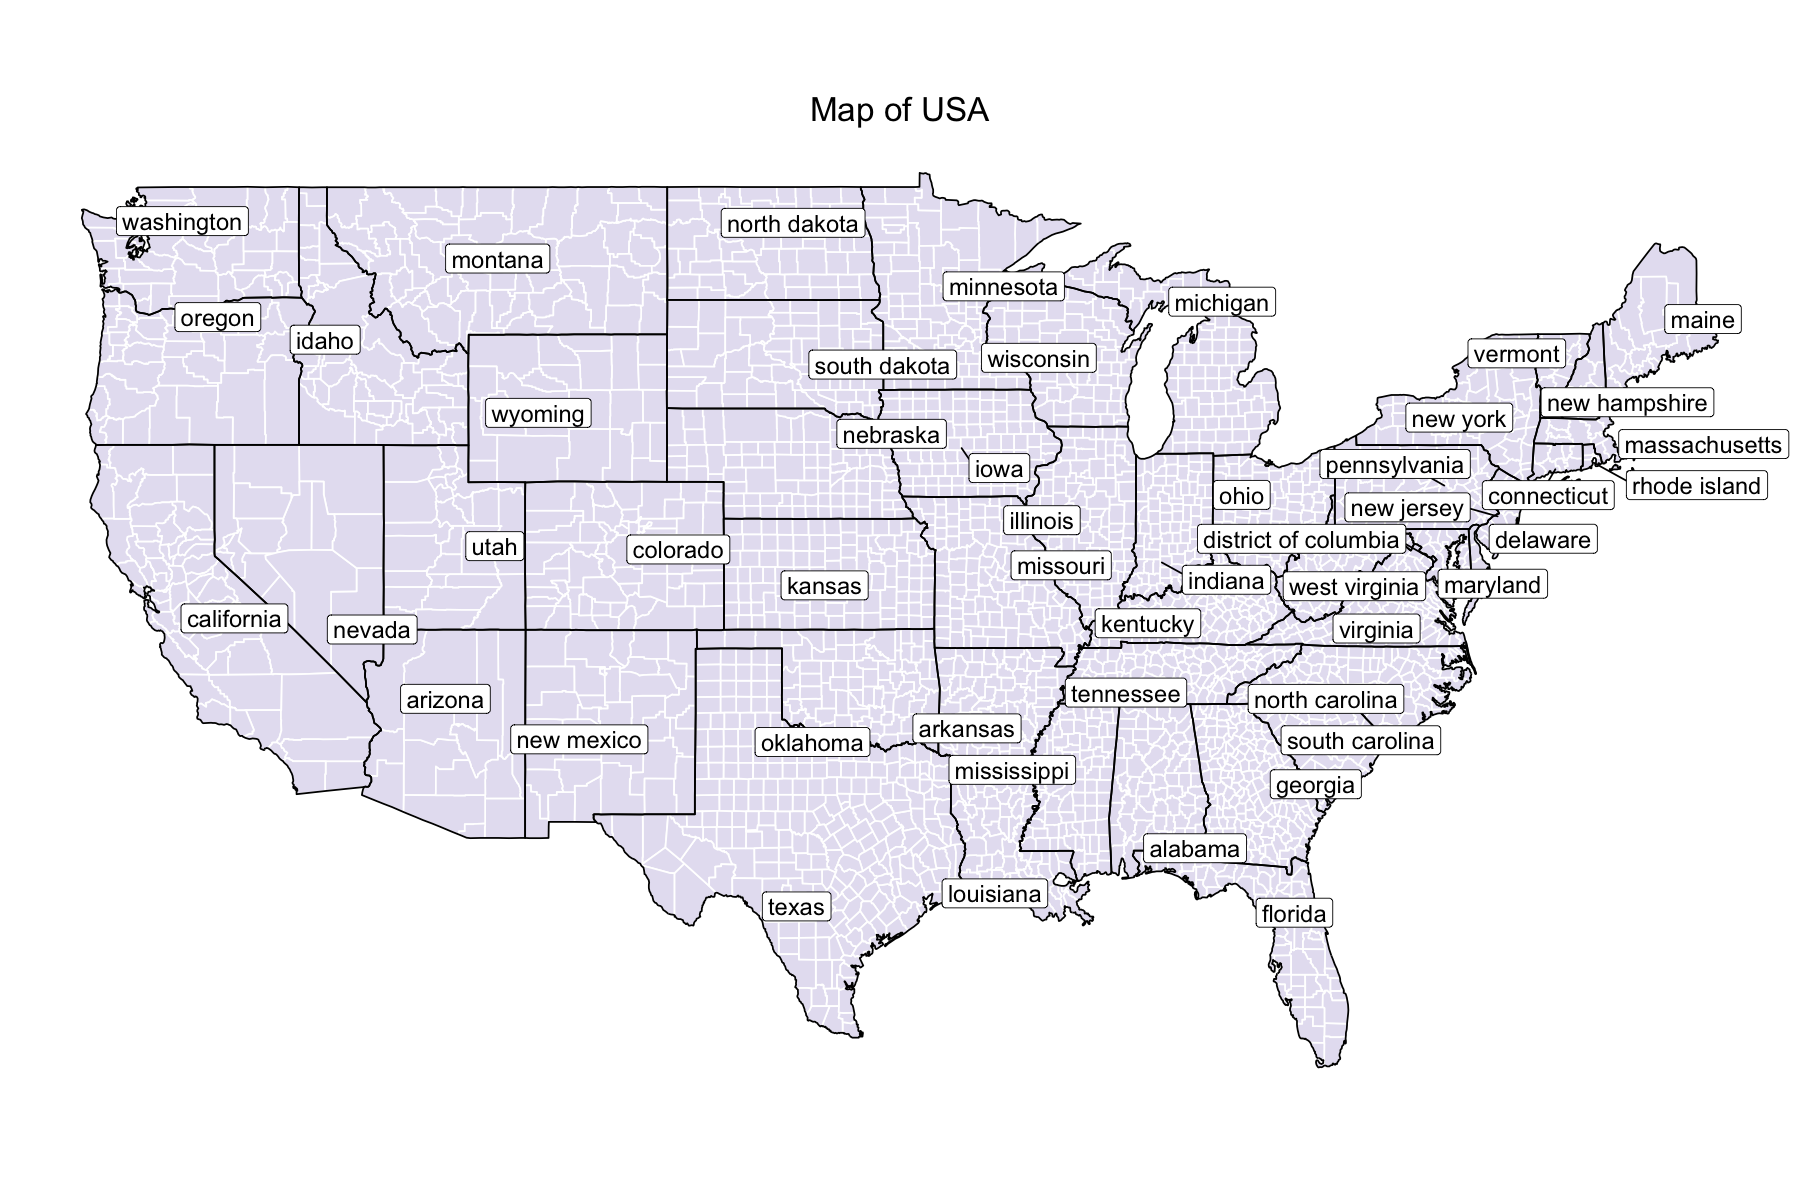

In [12]:
ggplot() +
  geom_polygon(data = us_county_map, aes(x = long, y = lat, group = group), fill = "#CBC3E3", color = "white", alpha = 0.5) +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), color = "black", fill="NA") +
  geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black",  max.overlaps=20) +
  coord_fixed(1.3) +
  labs(title = "Map of USA") +  # Add a title
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(plot.title = element_text(size = 20)) 

Added counties. Key solve was the NA fill for the second layer. 

## Question 3
Fetch the U.S. Unemployment data (year 2009) and combine it with your county map. Hint: you will need to convert your state names to their abbreviations before you combine the two dataframes, and that you order your final dataframe.

In [13]:

# https://www.rdocumentation.org/packages/astsa/versions/1.14/topics/unemp
# get the unemployment data 
data(unemp)

# map abbreviations to full state names
us_county_map$state <- state.abb[match(us_county_map$region, tolower(state.name))]


# join unemployment data to state county map on dual index
us_county_map_unemp <- left_join(us_county_map, unemp, by = c("subregion" = "county", "state" = "state"))
head(us_county_map_unemp)


long      lat      group order region  subregion state id       state_fips
1 -86.50517 32.34920 1     1     alabama autauga   AL    CN010010 1         
2 -86.53382 32.35493 1     2     alabama autauga   AL    CN010010 1         
3 -86.54527 32.36639 1     3     alabama autauga   AL    CN010010 1         
4 -86.55673 32.37785 1     4     alabama autauga   AL    CN010010 1         
5 -86.57966 32.38357 1     5     alabama autauga   AL    CN010010 1         
6 -86.59111 32.37785 1     6     alabama autauga   AL    CN010010 1         
  county_fips name               year rate
1 1           Autauga County, AL 2009 9.7 
2 1           Autauga County, AL 2009 9.7 
3 1           Autauga County, AL 2009 9.7 
4 1           Autauga County, AL 2009 9.7 
5 1           Autauga County, AL 2009 9.7 
6 1           Autauga County, AL 2009 9.7

## Question 4
Create a choropleth map of US, divided by geographical areas (states, counties) that are coloured (the counties) in relation to the unemployment rate.

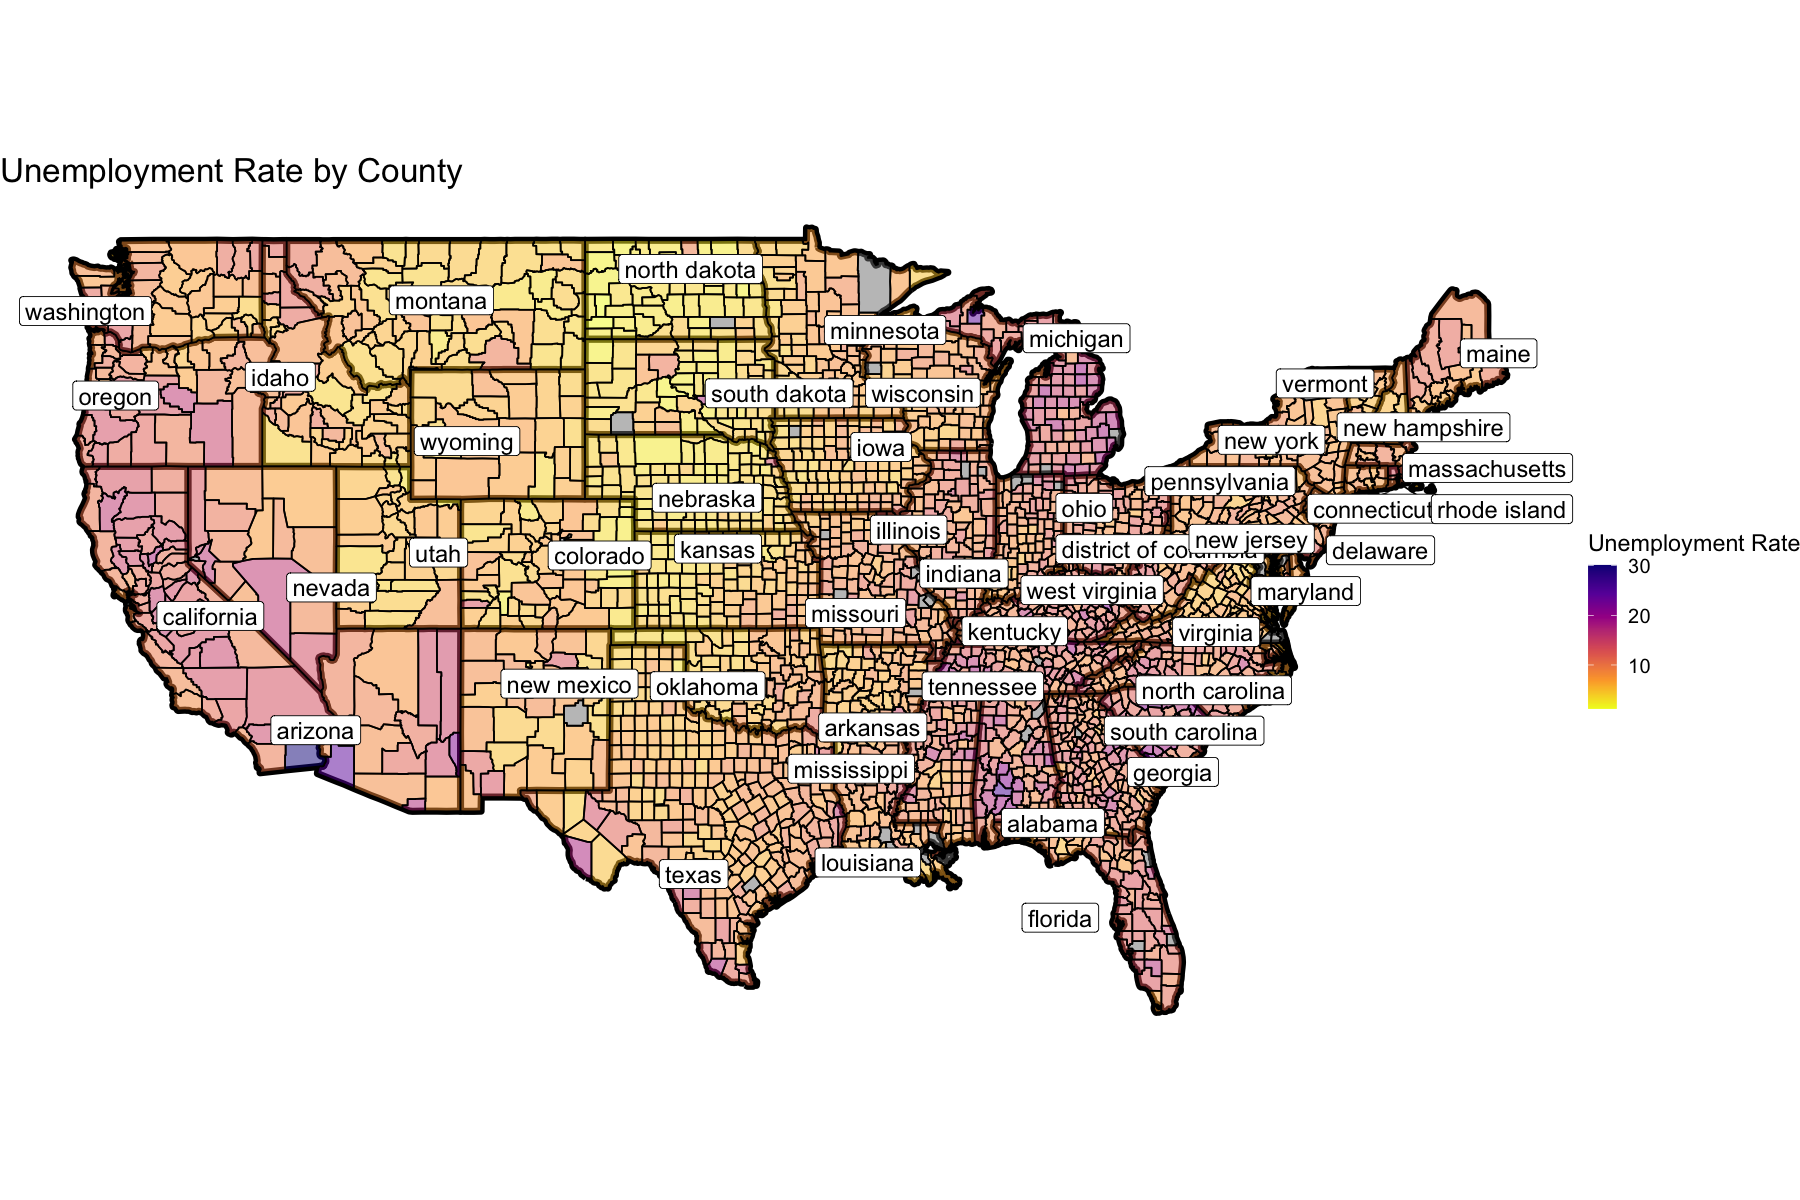

In [14]:

ggplot() +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), fill = "white", color = "black", linewidth=2) +
 geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group,  fill = rate), color = "black", alpha = 0.5) +
 geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black",  max.overlaps = 25) +
 scale_fill_viridis_c(option = "plasma", direction = -1) +
 labs(title = "Unemployment Rate by County", fill="Unemployment Rate") +  # Add a title
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

Get all states with counties. Then plotted counties in relation to the unemployment rate. 

## Question 5
Fetch from the homicide dataset the data for 2009.

In [15]:
homicide = read.csv("./homicide.csv")

In [16]:
homicide <- filter(homicide, Year == 2009)


In [17]:
colnames(homicide)

[1] "Record.ID"             "Agency.Code"           "Agency.Name"          
 [4] "Agency.Type"           "City"                  "State"                
 [7] "Year"                  "Month"                 "Incident"             
[10] "Crime.Type"            "Crime.Solved"          "Victim.Sex"           
[13] "Victim.Age"            "Victim.Race"           "Victim.Ethnicity"     
[16] "Perpetrator.Sex"       "Perpetrator.Age"       "Perpetrator.Race"     
[19] "Perpetrator.Ethnicity" "Relationship"          "Weapon"               
[22] "Victim.Count"          "Perpetrator.Count"     "Record.Source"

## Question 6
Aggregate the homicide cases (rows) per state (you can either keep the raw counts or convert them to percentages over the total homicides recorded across the country.

In [18]:
# Summarize data by state
homicide_by_state <- homicide %>%
  group_by(State) %>%
  summarise(
    homicide_count = n(),
    avg_vic_age = mean(Victim.Age),
    avg_victim_count = mean(Victim.Count),
    avg_perp_age = mean(Perpetrator.Age),  # Corrected: Wrapped in summarise()
    avg_perp_count = mean(Perpetrator.Count)  # Corrected: Wrapped in summarise()
  ) %>%
  arrange(desc(homicide_count))

head(homicide_by_state)


State        homicide_count avg_vic_age avg_victim_count avg_perp_age
1 California   2132           31.73921    0.12101313       18.35225    
2 Texas        1470           35.39252    0.11972789       22.38231    
3 Florida      1162           33.02324    0.16609294       22.21343    
4 New York      781           33.19974    0.17925736       18.11908    
5 Pennsylvania  741           34.58435    0.09446694       20.88664    
6 Michigan      646           36.62539    0.19814241       18.11920    
  avg_perp_count
1 0.1744841     
2 0.2006803     
3 0.2203098     
4 0.1177977     
5 0.1282051     
6 0.3513932

In [19]:
# create column for % of homiicdes per state

homicide_by_state <- homicide_by_state %>%
  mutate(pct_of_total = homicide_count / sum(homicide_count) * 100)

In [20]:
head(homicide_by_state)

State        homicide_count avg_vic_age avg_victim_count avg_perp_age
1 California   2132           31.73921    0.12101313       18.35225    
2 Texas        1470           35.39252    0.11972789       22.38231    
3 Florida      1162           33.02324    0.16609294       22.21343    
4 New York      781           33.19974    0.17925736       18.11908    
5 Pennsylvania  741           34.58435    0.09446694       20.88664    
6 Michigan      646           36.62539    0.19814241       18.11920    
  avg_perp_count pct_of_total
1 0.1744841      13.459596   
2 0.2006803       9.280303   
3 0.2203098       7.335859   
4 0.1177977       4.930556   
5 0.1282051       4.678030   
6 0.3513932       4.078283

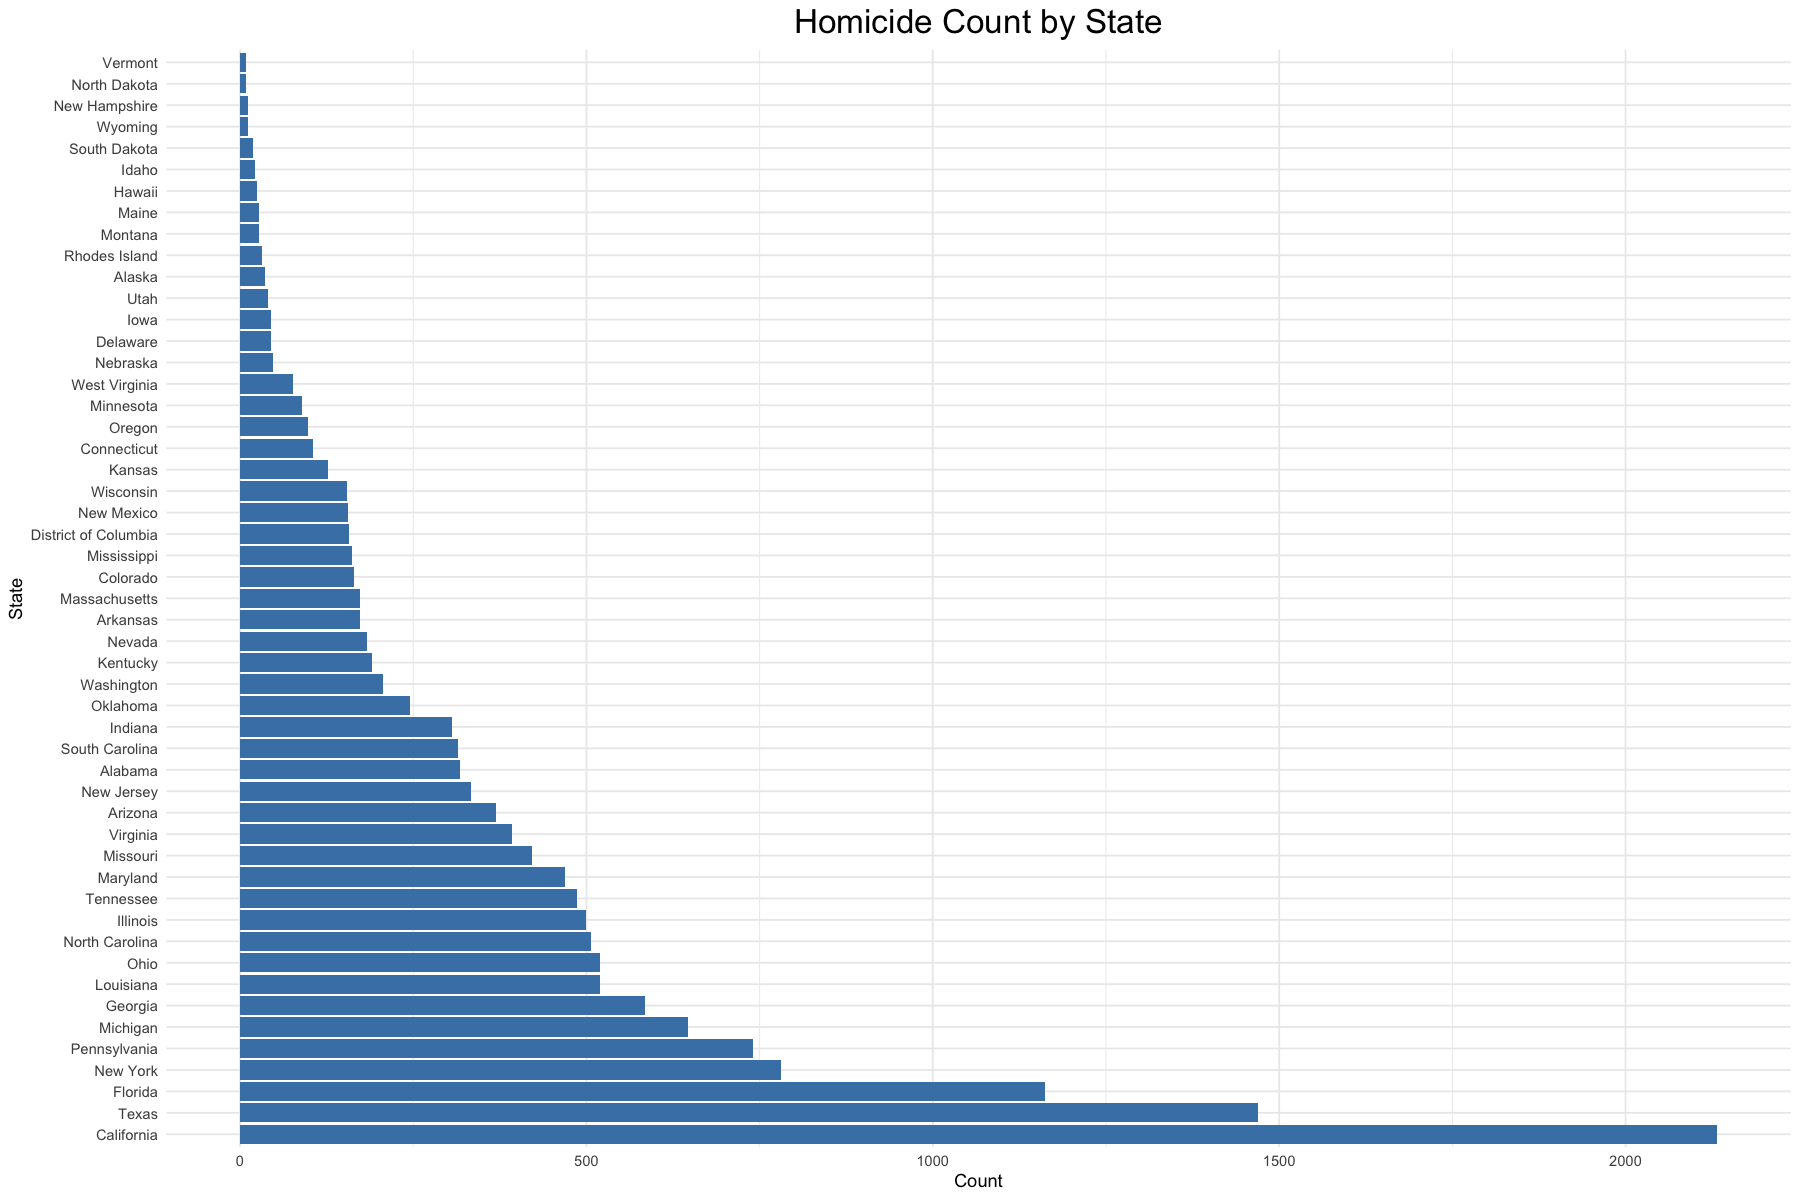

In [21]:
# plot bar chart of homicide count by state

ggplot(homicide_by_state, aes(x = reorder(State, -homicide_count), y = homicide_count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Homicide Count by State", x = "State", y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(plot.title = element_text(size = 20)) 


Check out the count of homicides by state. 

## Question 7
After you perform a join of your us map with the homicide data by `"regions"`, create a choropleth map of US, divided by geographical areas (states, counties) that are coloured (the counties) in relation to the homicide rate.


In [22]:
head(homicide_by_state)

State        homicide_count avg_vic_age avg_victim_count avg_perp_age
1 California   2132           31.73921    0.12101313       18.35225    
2 Texas        1470           35.39252    0.11972789       22.38231    
3 Florida      1162           33.02324    0.16609294       22.21343    
4 New York      781           33.19974    0.17925736       18.11908    
5 Pennsylvania  741           34.58435    0.09446694       20.88664    
6 Michigan      646           36.62539    0.19814241       18.11920    
  avg_perp_count pct_of_total
1 0.1744841      13.459596   
2 0.2006803       9.280303   
3 0.2203098       7.335859   
4 0.1177977       4.930556   
5 0.1282051       4.678030   
6 0.3513932       4.078283

In [23]:
# join homicide data to state county map
homicide_by_state$State <- tolower(homicide_by_state$State)

us_states_map_homicide <- left_join(us_states_map, homicide_by_state, by = c("region" = "State"))
head(us_states_map_homicide)

long      lat      group order region  subregion count cent_long cent_lat
1 -87.46201 30.38968 1     1     alabama NA        3092  -86.85342 31.66372
2 -87.48493 30.37249 1     2     alabama NA        3092  -86.85342 31.66372
3 -87.52503 30.37249 1     3     alabama NA        3092  -86.85342 31.66372
4 -87.53076 30.33239 1     4     alabama NA        3092  -86.85342 31.66372
5 -87.57087 30.32665 1     5     alabama NA        3092  -86.85342 31.66372
6 -87.58806 30.32665 1     6     alabama NA        3092  -86.85342 31.66372
  homicide_count avg_vic_age avg_victim_count avg_perp_age avg_perp_count
1 318            36.80189    0.006289308      21.77987     0.003144654   
2 318            36.80189    0.006289308      21.77987     0.003144654   
3 318            36.80189    0.006289308      21.77987     0.003144654   
4 318            36.80189    0.006289308      21.77987     0.003144654   
5 318            36.80189    0.006289308      21.77987     0.003144654   
6 318            36.80189    0.006289308      21.77987     0.003144654   
  pct_of_total
1 2.007576    
2 2.007576    
3 2.007576    
4 2.007576    
5 2.007576    
6 2.007576

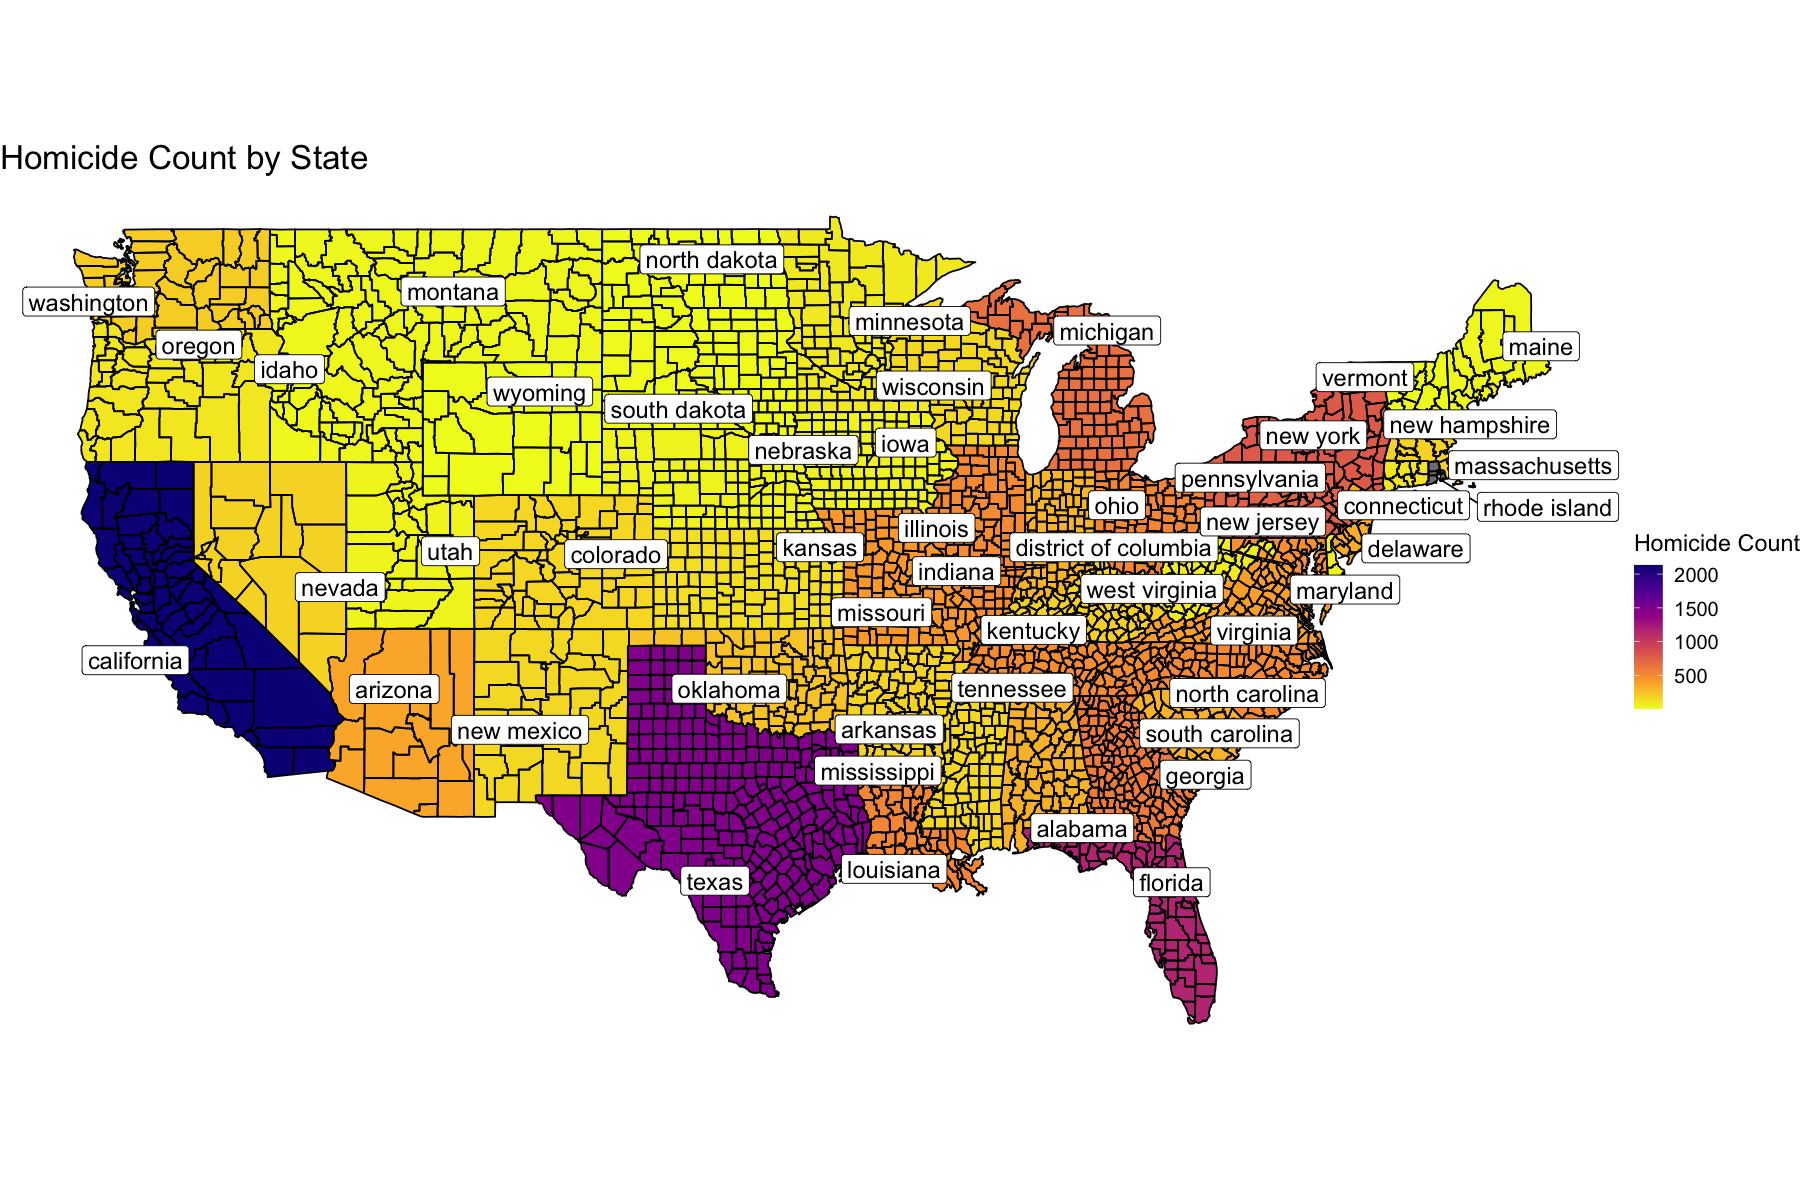

In [24]:

  
ggplot() +
  geom_polygon(data = us_states_map_homicide, aes(x = long, y = lat, group = group, fill = homicide_count), linewidth=2) +
  scale_fill_viridis_c(name = "Homicide Count", option = "plasma", direction = -1) +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group), alpha = 0, fill = NA, color="black") + # Set fill color to white
  geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black", max.overlaps=30) +
  labs(title = "Homicide Count by State") +  # Add a title
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 


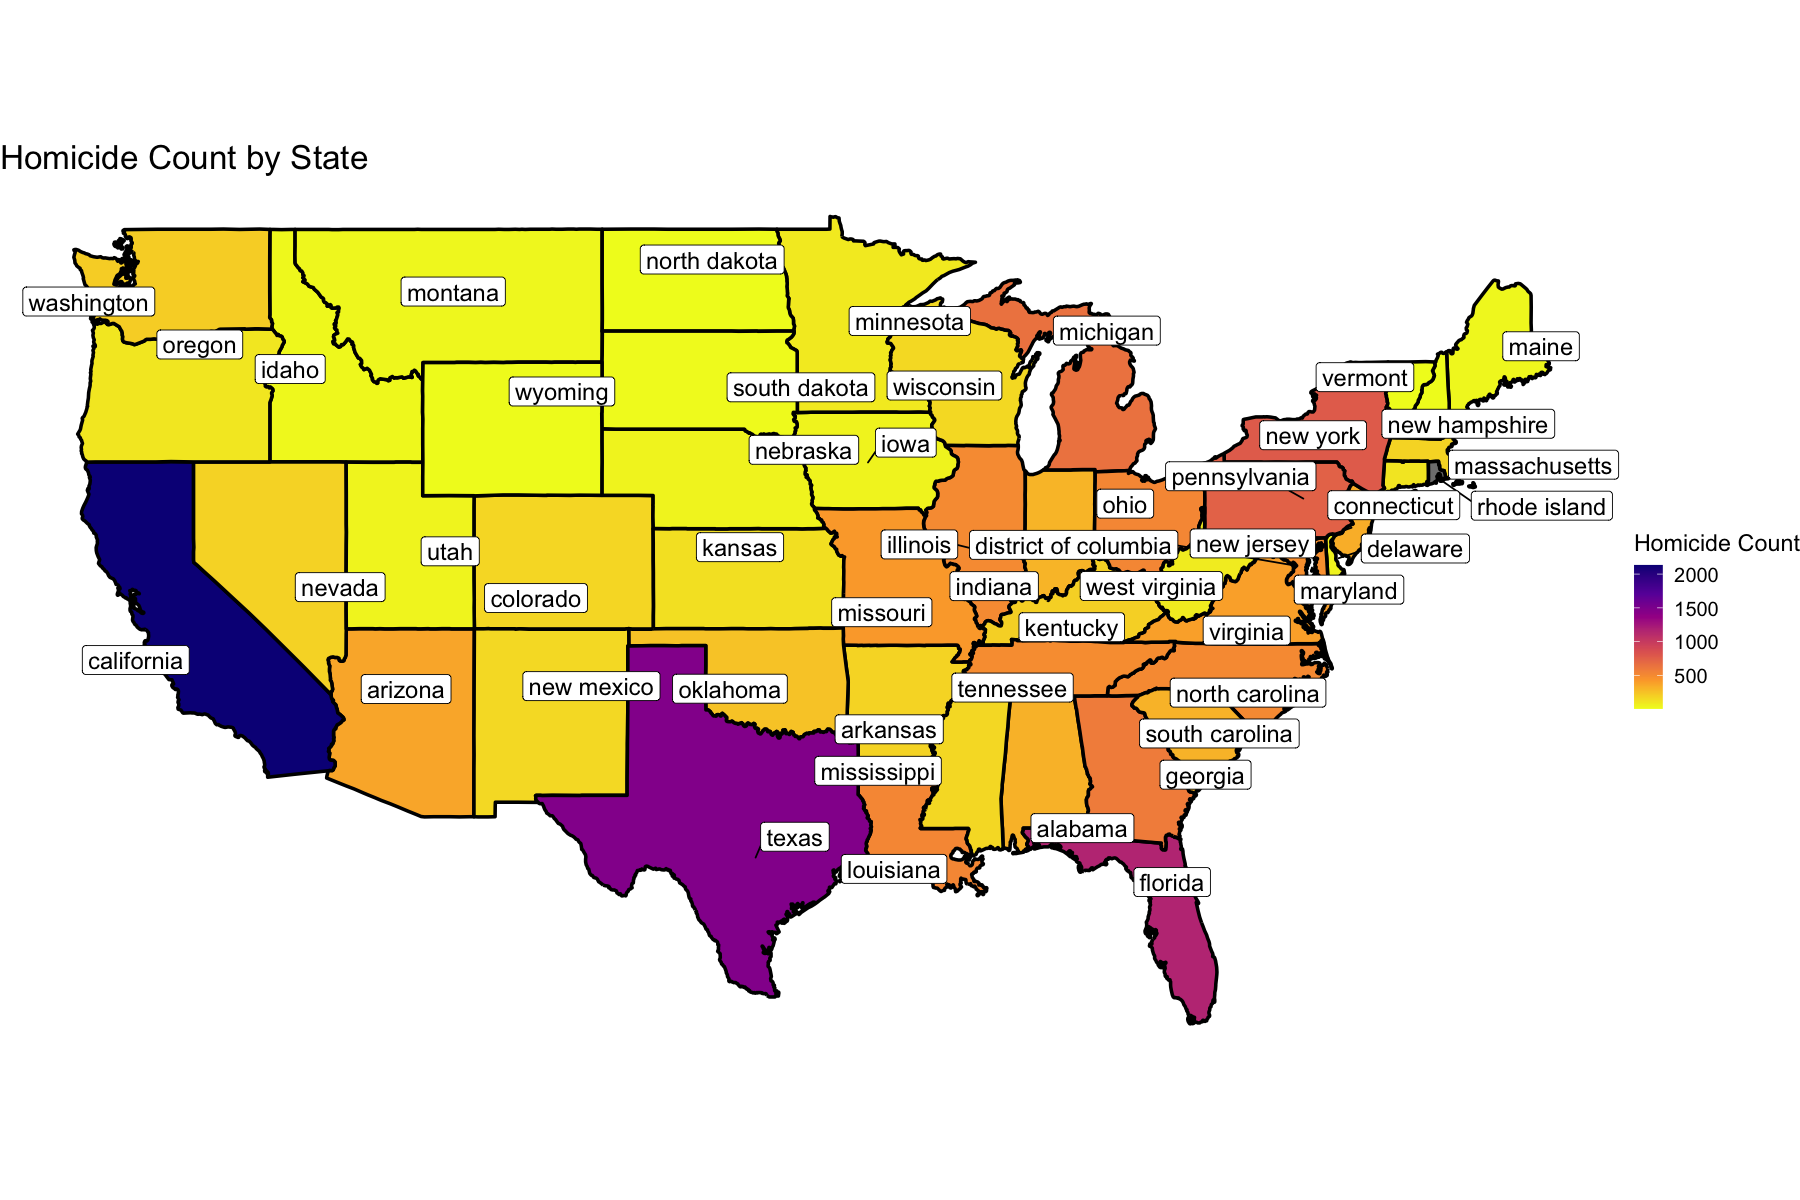

In [25]:

  
ggplot() +
  geom_polygon(data = us_states_map_homicide, aes(x = long, y = lat, group = group, fill = homicide_count), color="black", linewidth=1) +
  scale_fill_viridis_c(name = "Homicide Count", option = "plasma", direction = -1) +
  geom_label_repel(data = us_states_map_centroids, aes(x = cent_long, y = cent_lat, label = region), size = 5, color = "black", max.overlaps=30) +
  labs(title = "Homicide Count by State") +  # Add a title
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 


Looks better without county lines.

## Question 8
If possible using facetting (or some other method) to put the two maps side by side and compare the data.

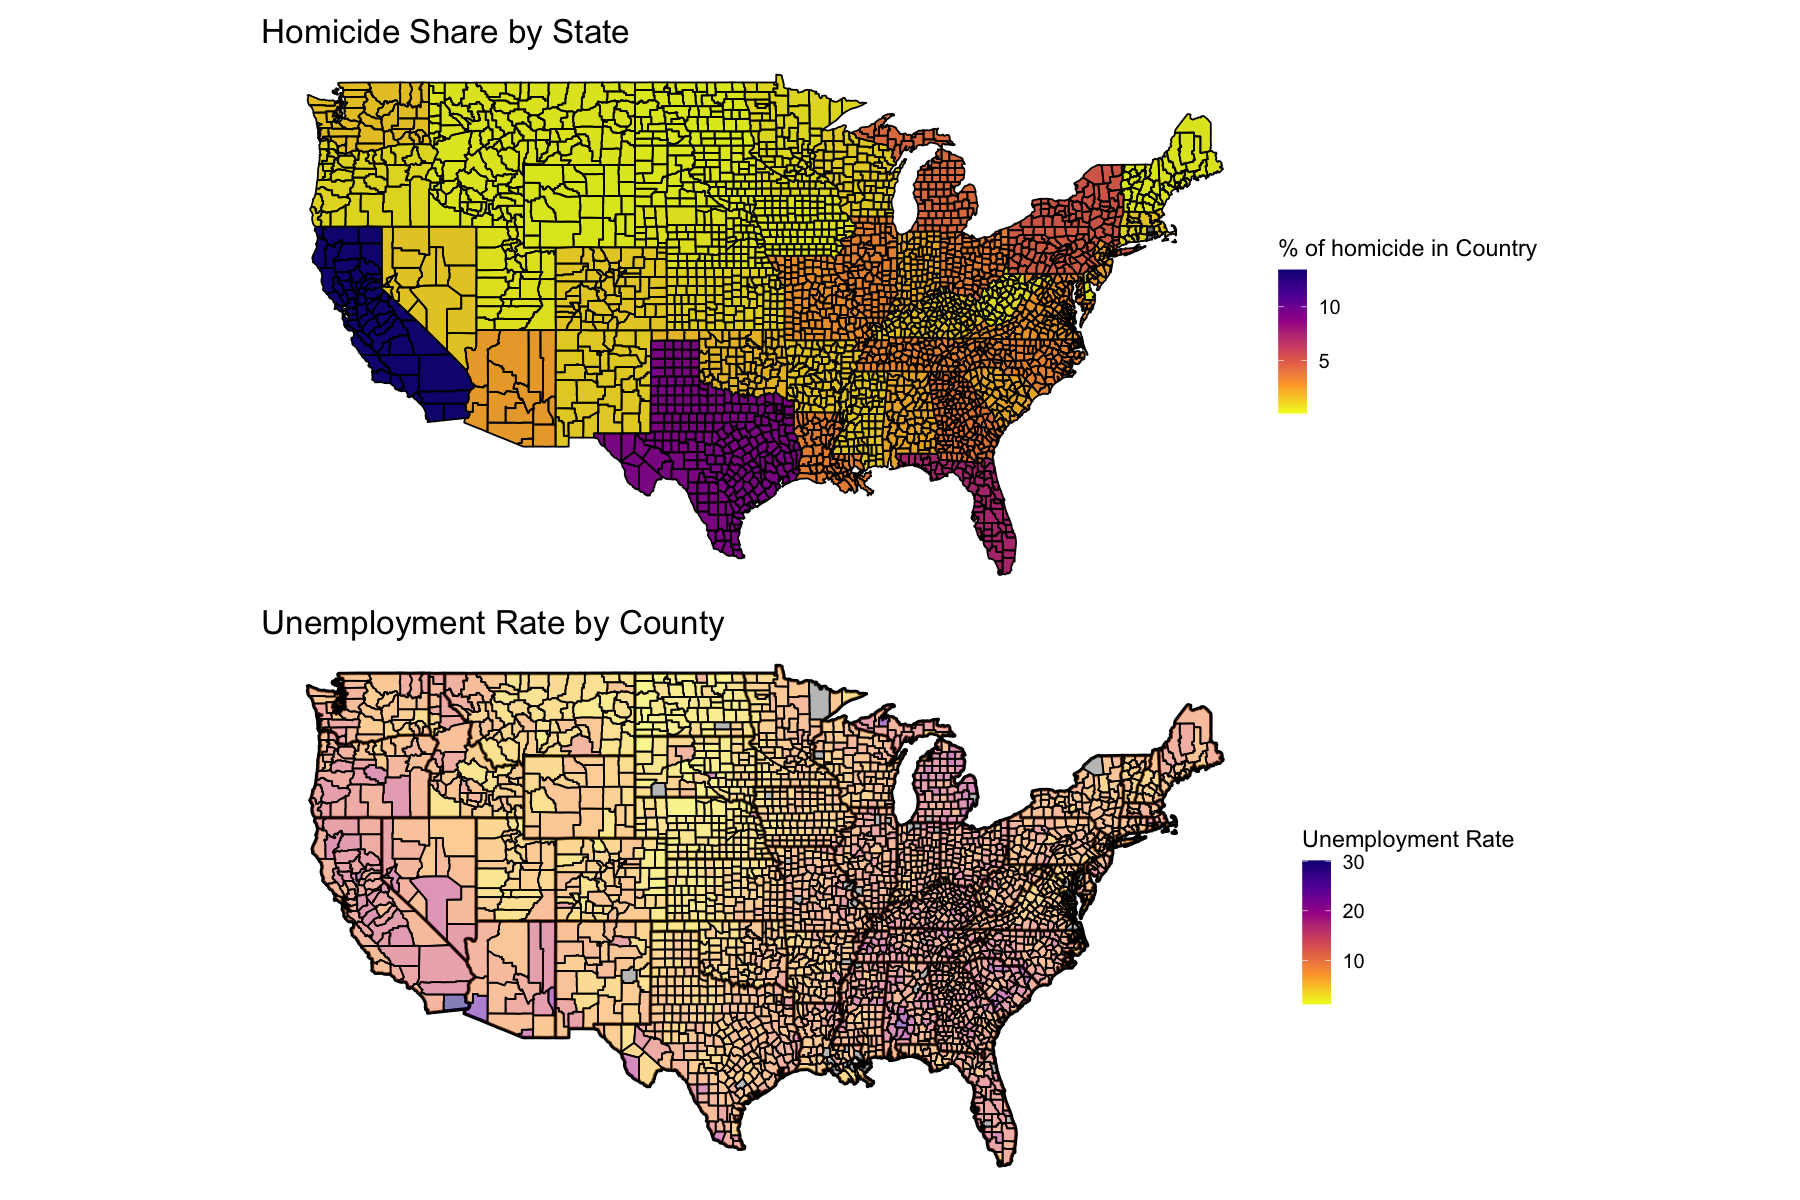

In [39]:
library(ggplot2)
library(patchwork)

#increase plot size
options(repr.plot.width=15, repr.plot.height=10)

# Define the first plot
plot1 <- ggplot() +
  geom_polygon(data = us_states_map_homicide, aes(x = long, y = lat, group = group, fill = pct_of_total), linewidth=1) +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group), color = "black", alpha = 0.1) +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  labs(title = "Homicide Share by State", fill = "% of homicide in Country") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Define the second plot
plot2 <- ggplot() +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), fill = "white", color = "black", linewidth=1) +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group, fill = rate), color = "black", alpha = 0.5) +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  labs(title = "Unemployment Rate by County", fill = "Unemployment Rate") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Combine the plots side by side
plot1 + plot2 + plot_layout(ncol = 1)


The colors dont allow you to see much. Log scaling to get a better view. 

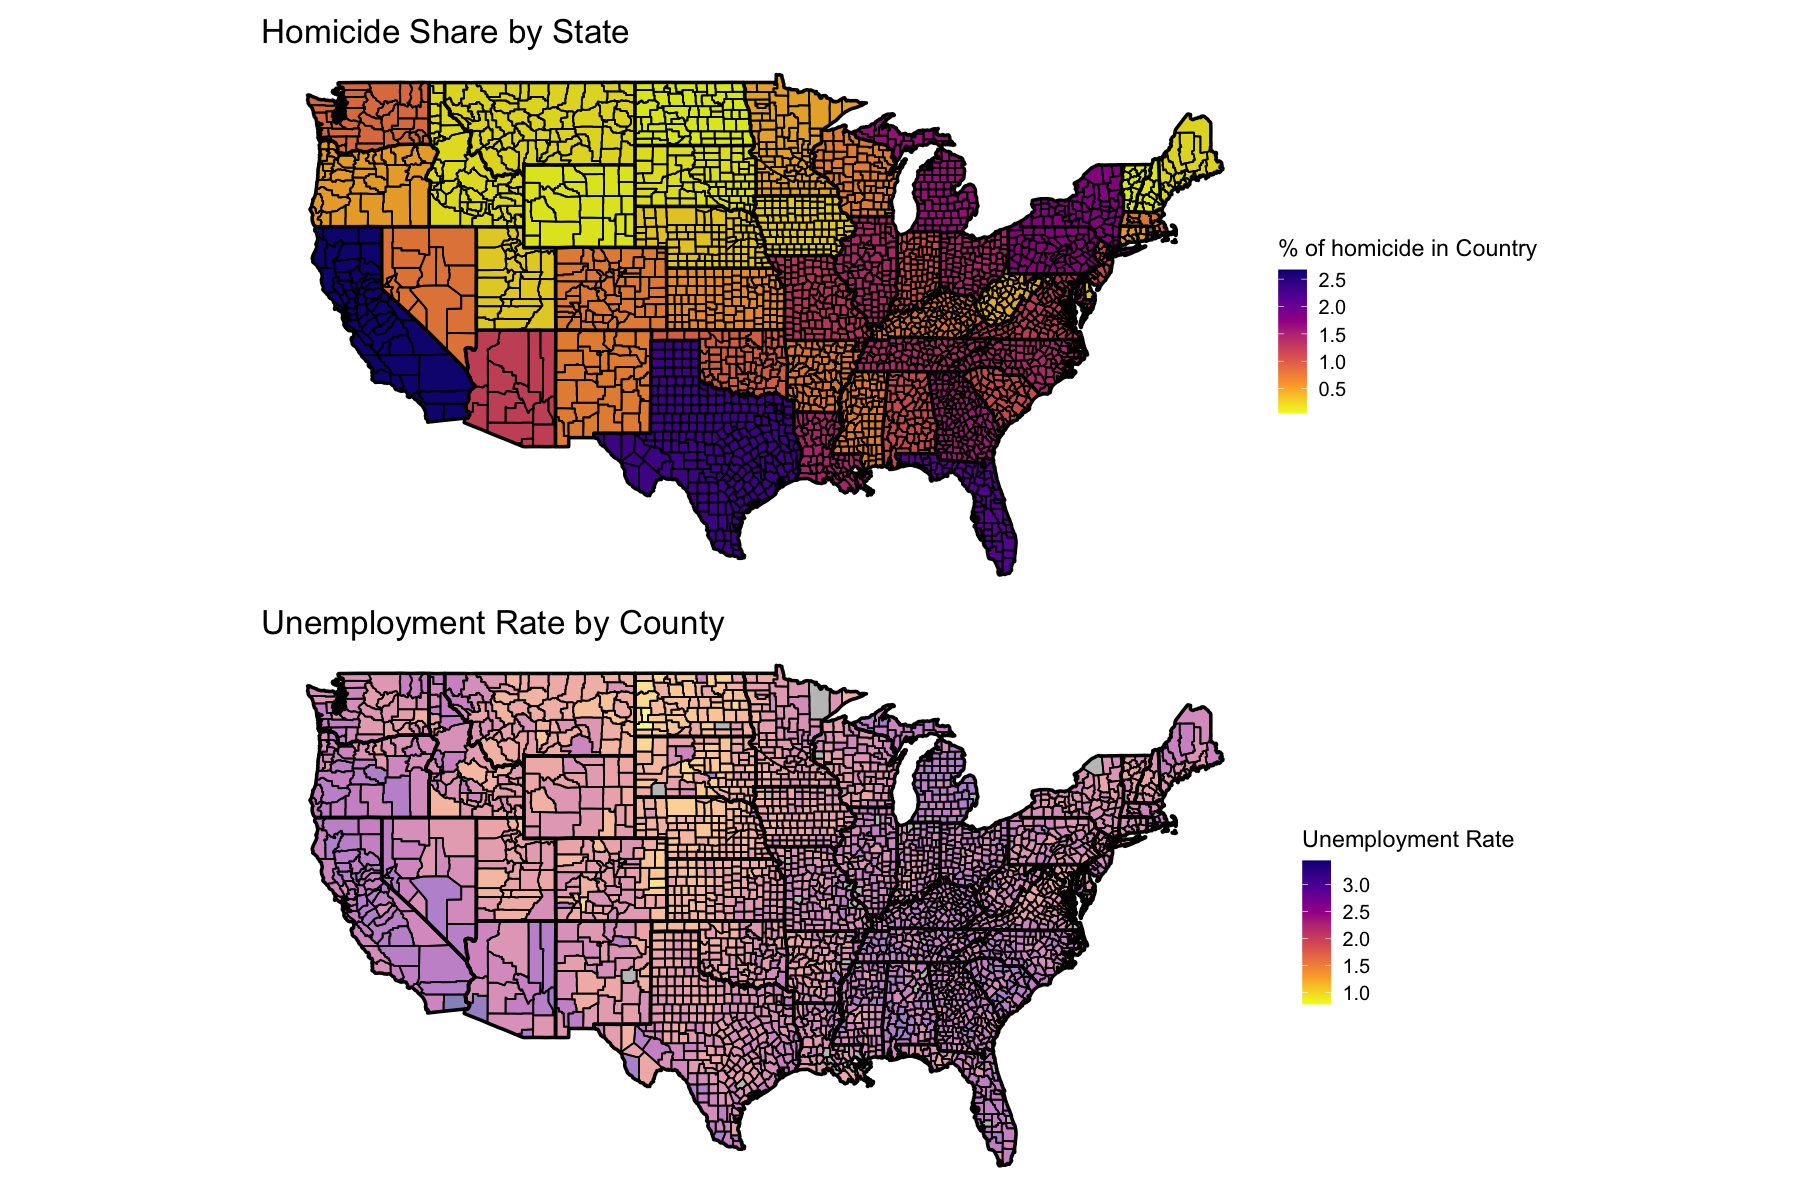

In [40]:
# log scale for unemployment rate

us_states_map_homicide$scaled_pct_of_total <- log(us_states_map_homicide$pct_of_total + 1)

us_county_map_unemp$scaled_rate <- log(us_county_map_unemp$rate + 1)

#increase plot size
options(repr.plot.width=15, repr.plot.height=10)

# Define the first plot
plot1 <- ggplot() +
  geom_polygon(data = us_states_map_homicide, aes(x = long, y = lat, group = group, fill = scaled_pct_of_total), color = "black", linewidth=1) +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group), color = "black", alpha = 0.1) +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  labs(title = "Homicide Share by State", fill = "% of homicide in Country") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Define the second plot
plot2 <- ggplot() +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group, fill = scaled_rate), color = "black", alpha = 0.5) +
  geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), fill = "NA", color = "black",  linewidth=1) +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  # add title and change legend title
  labs(title = "Unemployment Rate by County", fill = "Unemployment Rate") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Combine the plots side by side
plot1 + plot2 + plot_layout(ncol = 1)


The borders are hindering a eyeball analysis. 

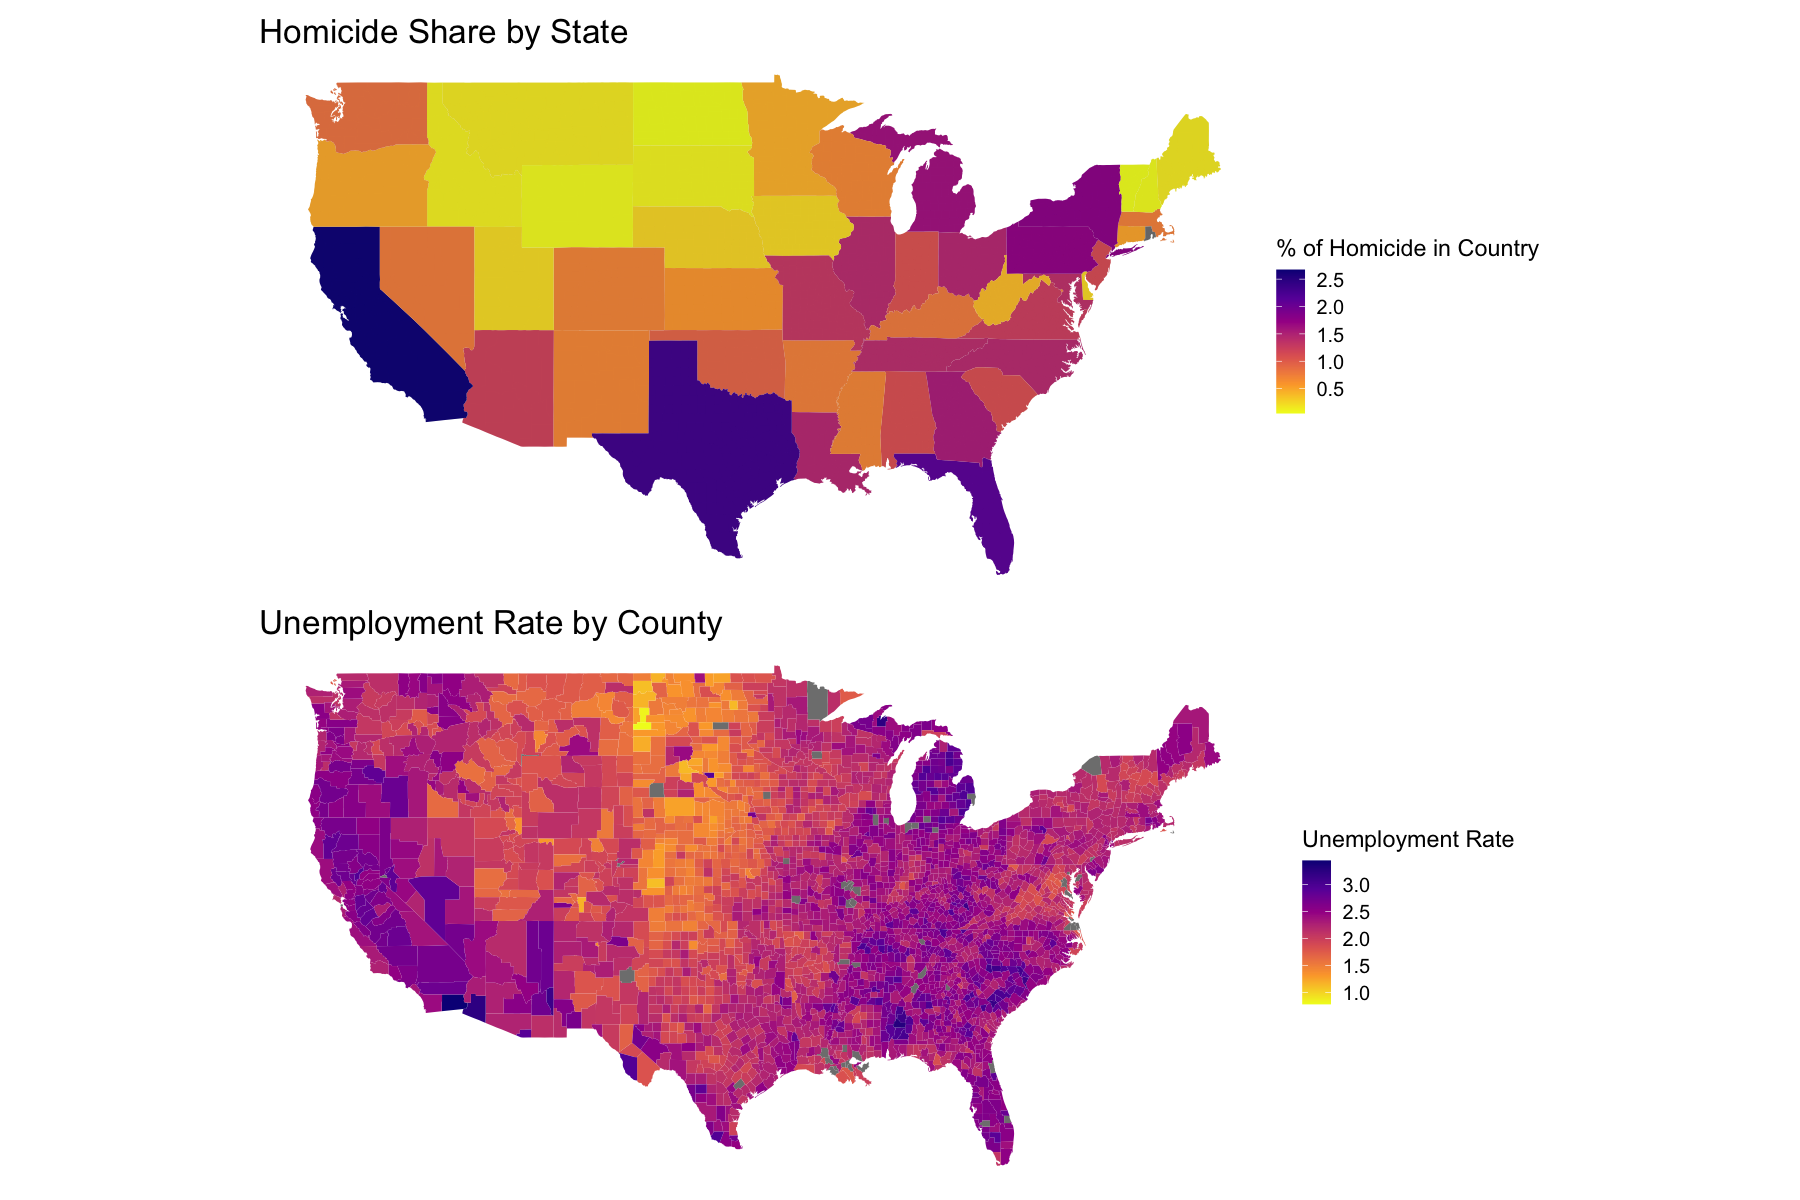

In [28]:
# log scale for unemployment rate

us_states_map_homicide$scaled_pct_of_total <- log(us_states_map_homicide$pct_of_total + 1)

us_county_map_unemp$scaled_rate <- log(us_county_map_unemp$rate + 1)

#increase plot size
options(repr.plot.width=15, repr.plot.height=10)

# Define the first plot
plot1 <- ggplot() +
  geom_polygon(data = us_states_map_homicide, aes(x = long, y = lat, group = group, fill = scaled_pct_of_total), color = "NA", linewidth=1) +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group), color = "NA", alpha = 0.1) +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  labs(title = "Homicide Share by State", fill = "% of Homicide in Country") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Define the second plot
plot2 <- ggplot() +
  geom_polygon(data = us_county_map_unemp, aes(x = long, y = lat, group = group, fill = scaled_rate), color = "NA") +
  scale_fill_viridis_c(option = "plasma", direction = -1) +
  # add title and change legend title
  labs(title = "Unemployment Rate by County", fill = "Unemployment Rate") +
  coord_fixed(1.3) +
  theme_void() + 
  theme(plot.title = element_text(size = 20)) +
  theme(legend.text = element_text(size = 12),   # Increase legend text size to 12 points
        legend.title = element_text(size = 14)) 

# Combine the plots side by side
plot1 + plot2 + plot_layout(ncol = 1)


The southwest region is the most highly correlated with unemployment and homicide rates. Surprisingly, Texas has relatively high levels of homicides, but lower unemployment. The southeast of the country has medium levels of both unemployment and homicides. 